Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Accuracy Score: 1.0


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


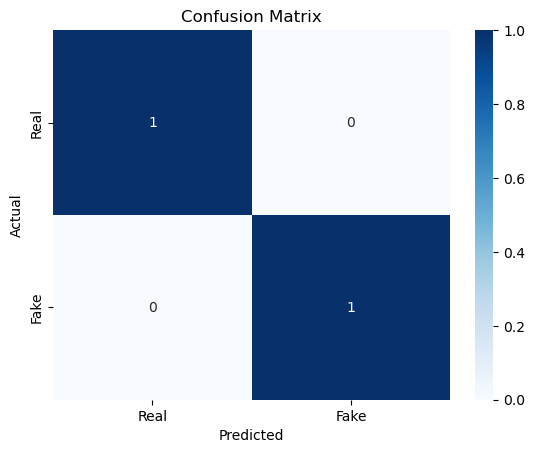

Accuracy Score: 100.00%
Prediction: Real News


In [3]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download('stopwords')

# Load dataset
df = pd.read_csv('campus_news.csv')

# Combine title and content for analysis
df['text'] = df['title'] + " " + df['content']

# Clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"\W", " ", text)  # remove special chars
    text = re.sub(r"\s+", " ", text)  # remove extra whitespace
    return text

df['clean_text'] = df['text'].apply(clean_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join(
    word for word in x.split() if word not in stop_words))

# Encode labels
df['label'] = df['label'].map({'real': 0, 'fake': 1})

# Split data
X = df['clean_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model training
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Predict on new news
def predict_news(news_text):
    cleaned = clean_text(news_text)
    cleaned = ' '.join(word for word in cleaned.split() if word not in stop_words)
    vec = vectorizer.transform([cleaned])
    prediction = model.predict(vec)[0]
    return "Fake News" if prediction == 1 else "Real News"


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy * 100:.2f}%")


# Example usage
new_news = "Vice Chancellor has announced a new policy for final year students."
print("Prediction:", predict_news(new_news))
